In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
df = pd.read_csv("/Users/ujjwalbhatta/Desktop/ecommerce-product-success-predictor/data/processed/amazon_electronics_clean.csv")

In [3]:
df

,parent_asin,main_category,product_title,description,price,average_rating,rating_number,brand,store,details,rating,review_title,text,verified_purchase,brand_consolidated
0,B08FF2X3PV,All Electronics,canon tr8620 all-in-one printer for home offic...,when you need a compact home office printer th...,24.99,4.3,2924,Canon,Canon,{'Product Dimensions': '13.8 x 17.3 x 7.5 inch...,1,run run run away,mine is a piece of nothing and it consumes ink...,False,Canon
1,B086KTM3WQ,Camera & Photo,arenti indoor home security camera 1080p hd 2 ...,no description,42.98,4.2,2535,Arenti,Arenti,{'Product Dimensions': '5.5 x 3.5 x 2.4 inches...,5,buy this camera!,easy to operate and install! i love that it re...,True,Other
2,B00FB50SBU,Computers,amazon basics 14-inch tablet bag black,"product description , amazon basics 14-inch ta...",18.30,4.7,82733,Amazon Basics,Amazon Basics,{'Standing screen display size': '14.1 Inches'...,5,i love it!,perfect for my dell. very sturdy!,True,Amazon Basics
3,B08BL7KZ38,All Electronics,cord cover wall 142in one-cord channel cord hi...,no description,11.99,4.5,3741,Delamu,Delamu,{'Product Dimensions': '14.2 x 0.48 x 0.3 inch...,5,great for apartments!,videoid 9e080e2e712e8462e7b60d350c73c813 i had...,True,Other
4,B0C3KKZHBC,Home Audio & Theater,margaritaville tiki torch - waterproof bluetoo...,enjoy the tunes you love in style with margari...,79.99,4.2,4142,Sakar,Sakar,{'Product Dimensions': '9.4 x 5.4 x 10 inches'...,4,good outdoor speaker,bought this for back yardworks great for small...,True,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,B089QL35T2,All Electronics,edup love usb wifi adapter ac 650mbps nano siz...,no description,11.99,4.3,660,Edup Love,Edup Love,{'Package Dimensions': '4.37 x 3.58 x 0.55 inc...,5,very fast,easy to set up and fast. i used it to revive a...,True,Other
29994,B00FVU5VJE,All Electronics,omoton kindle paperwhite case cover - the thin...,no description,24.99,4.4,2817,Omoton,Omoton,{'Product Dimensions': '6.69 x 4.65 x 0.37 inc...,5,excellent so far,excellent for the price,True,OMOTON
29995,B077YBMN1X,Computers,swissgear sa1923 noir satin tsa friendly scans...,from the maker of the genuine swiss army knife...,27.69,4.8,3105,Swissgear,Swissgear,"{'Standing screen display size': '15 Inches', ...",4,four stars,ideal backpack,True,SwissGear
29996,B08Y28TY6Q,All Electronics,reshow cassette player portable tape player ca...,no description,34.99,3.9,9335,Reshow,Reshow,"{'Product Dimensions': '5 x 1.2 x 1.5 inches',...",1,suck,it sucked,True,Other


Target Variable

overall >= 3.5 → Low Risk
overall < 3.5 → High Risk

Gives us a binary classification problem (yes/no style).

In [4]:
df['risk_label'] = np.where(df['average_rating'] >= 3.5, 'Low Risk', 'High Risk')
risk_counts = df['risk_label'].value_counts()
risk_counts

risk_label
Low Risk     28517
High Risk     1481
Name: count, dtype: int64

Numeric Features
a) Price
Raw prices can vary a lot (from $5 to $5000).
Problem: Skewed distributions hurt models (many cheap products, few very expensive).
Solution: Log transformation → log(price)
Compresses the scale
Makes distribution closer to normal
Impact:
Helps models learn relative differences (cheap vs mid-range vs luxury)
Expensive products may have different risk patterns (e.g., higher expectations → harsher reviews).

b) Review Count
Number of reviews shows popularity + reliability.
Products with many reviews usually have more stable ratings.
Products with few reviews may be risky (unverified, inflated ratings).


Skew of price: 23.93
Skew of rating: 7.40


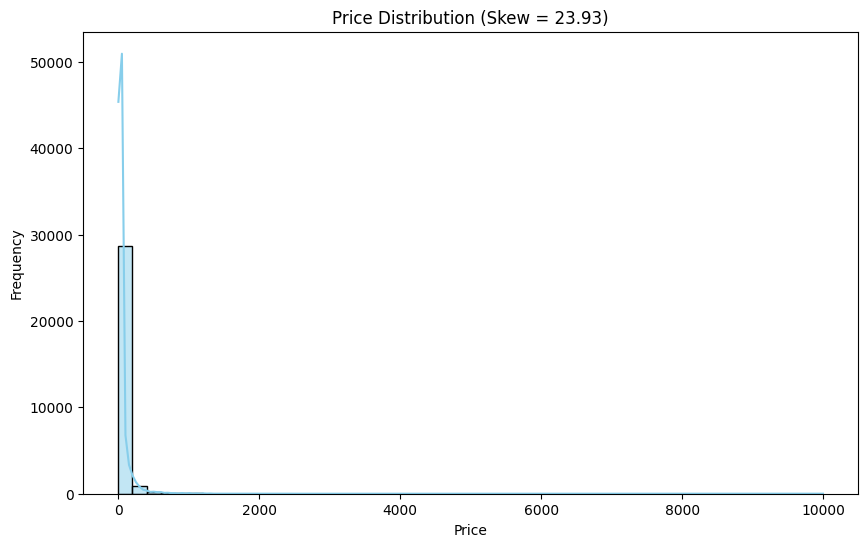

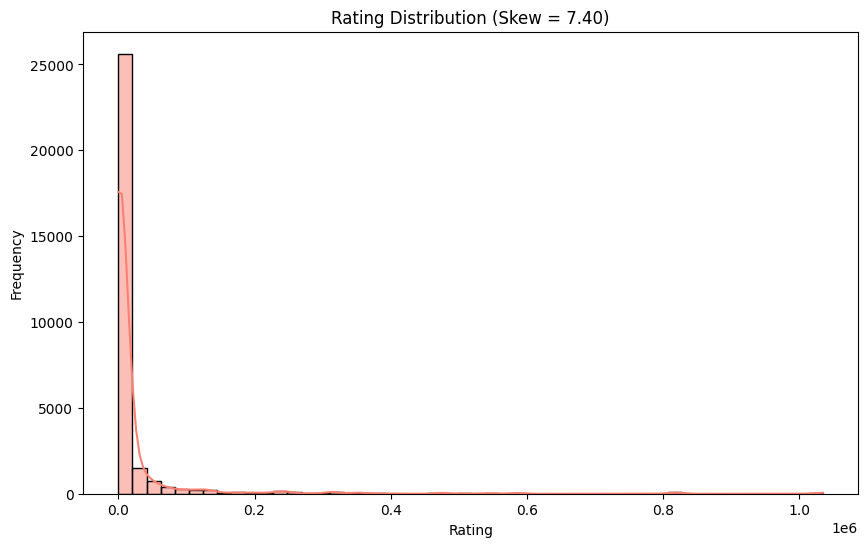

In [5]:

prices = df['price']
ratings = df['rating_number']

skew_price = skew(prices)
skew_rating = skew(ratings)

print(f"Skew of price: {skew_price:.2f}")
print(f"Skew of rating: {skew_rating:.2f}")

plt.figure(figsize=(10,6))
sns.histplot(prices, bins=50, kde=True, color='skyblue')
plt.title(f'Price Distribution (Skew = {skew_price:.2f})')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for ratings
plt.figure(figsize=(10,6))
sns.histplot(ratings, bins=50, kde=True, color='salmon')
plt.title(f'Rating Distribution (Skew = {skew_rating:.2f})')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [6]:
df['log_price'] = np.log1p(df['price'])
df['log_reviewCount'] = np.log1p(df['rating_number'])   # review count column


Skew of price: 1.09
Skew of rating: 0.01


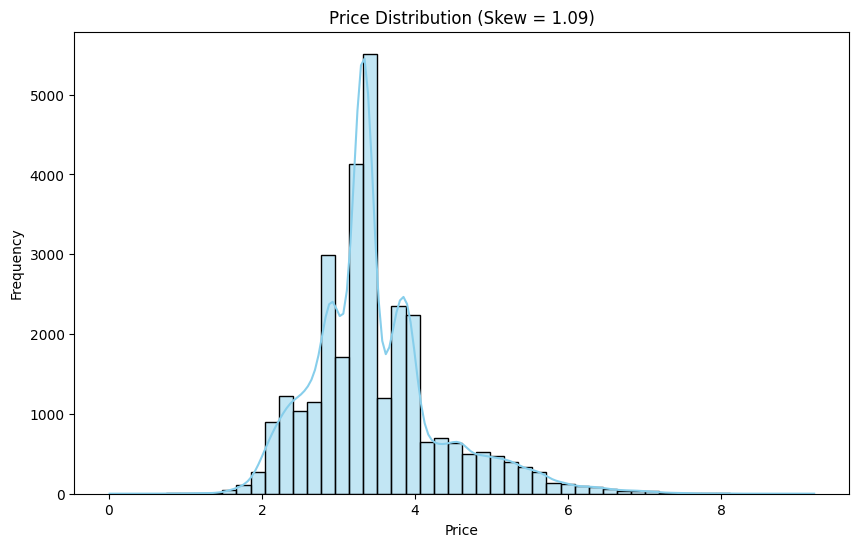

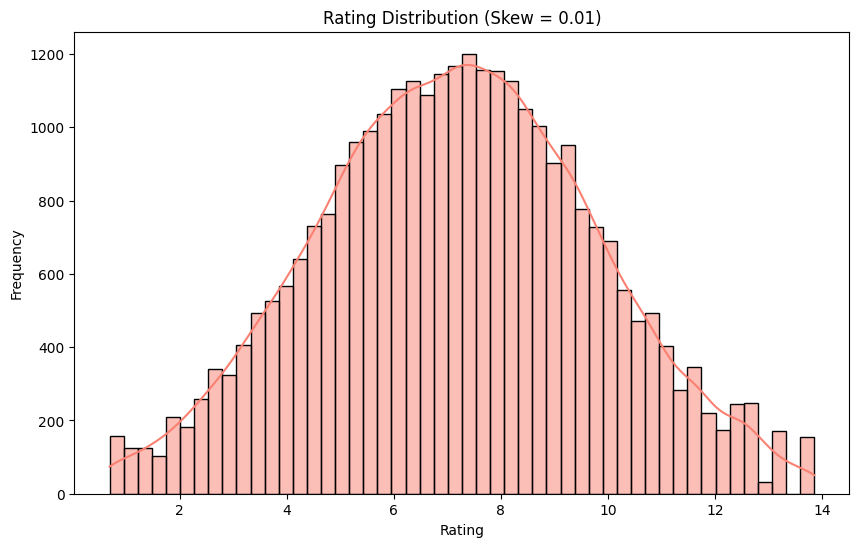

In [7]:
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns

prices = df['log_price']
ratings = df['log_reviewCount']

skew_price = skew(prices)
skew_rating = skew(ratings)

print(f"Skew of price: {skew_price:.2f}")
print(f"Skew of rating: {skew_rating:.2f}")

plt.figure(figsize=(10,6))
sns.histplot(prices, bins=50, kde=True, color='skyblue')
plt.title(f'Price Distribution (Skew = {skew_price:.2f})')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(ratings, bins=50, kde=True, color='salmon')
plt.title(f'Rating Distribution (Skew = {skew_rating:.2f})')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [8]:
df

,parent_asin,main_category,product_title,description,price,average_rating,rating_number,brand,store,details,rating,review_title,text,verified_purchase,brand_consolidated,risk_label,log_price,log_reviewCount
0,B08FF2X3PV,All Electronics,canon tr8620 all-in-one printer for home offic...,when you need a compact home office printer th...,24.99,4.3,2924,Canon,Canon,{'Product Dimensions': '13.8 x 17.3 x 7.5 inch...,1,run run run away,mine is a piece of nothing and it consumes ink...,False,Canon,Low Risk,3.257712,7.981050
1,B086KTM3WQ,Camera & Photo,arenti indoor home security camera 1080p hd 2 ...,no description,42.98,4.2,2535,Arenti,Arenti,{'Product Dimensions': '5.5 x 3.5 x 2.4 inches...,5,buy this camera!,easy to operate and install! i love that it re...,True,Other,Low Risk,3.783735,7.838343
2,B00FB50SBU,Computers,amazon basics 14-inch tablet bag black,"product description , amazon basics 14-inch ta...",18.30,4.7,82733,Amazon Basics,Amazon Basics,{'Standing screen display size': '14.1 Inches'...,5,i love it!,perfect for my dell. very sturdy!,True,Amazon Basics,Low Risk,2.960105,11.323386
3,B08BL7KZ38,All Electronics,cord cover wall 142in one-cord channel cord hi...,no description,11.99,4.5,3741,Delamu,Delamu,{'Product Dimensions': '14.2 x 0.48 x 0.3 inch...,5,great for apartments!,videoid 9e080e2e712e8462e7b60d350c73c813 i had...,True,Other,Low Risk,2.564180,8.227376
4,B0C3KKZHBC,Home Audio & Theater,margaritaville tiki torch - waterproof bluetoo...,enjoy the tunes you love in style with margari...,79.99,4.2,4142,Sakar,Sakar,{'Product Dimensions': '9.4 x 5.4 x 10 inches'...,4,good outdoor speaker,bought this for back yardworks great for small...,True,Other,Low Risk,4.394326,8.329175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,B089QL35T2,All Electronics,edup love usb wifi adapter ac 650mbps nano siz...,no description,11.99,4.3,660,Edup Love,Edup Love,{'Package Dimensions': '4.37 x 3.58 x 0.55 inc...,5,very fast,easy to set up and fast. i used it to revive a...,True,Other,Low Risk,2.564180,6.493754
29994,B00FVU5VJE,All Electronics,omoton kindle paperwhite case cover - the thin...,no description,24.99,4.4,2817,Omoton,Omoton,{'Product Dimensions': '6.69 x 4.65 x 0.37 inc...,5,excellent so far,excellent for the price,True,OMOTON,Low Risk,3.257712,7.943783
29995,B077YBMN1X,Computers,swissgear sa1923 noir satin tsa friendly scans...,from the maker of the genuine swiss army knife...,27.69,4.8,3105,Swissgear,Swissgear,"{'Standing screen display size': '15 Inches', ...",4,four stars,ideal backpack,True,SwissGear,Low Risk,3.356549,8.041091
29996,B08Y28TY6Q,All Electronics,reshow cassette player portable tape player ca...,no description,34.99,3.9,9335,Reshow,Reshow,"{'Product Dimensions': '5 x 1.2 x 1.5 inches',...",1,suck,it sucked,True,Other,Low Risk,3.583241,9.141633


Categorical Features (Brand, Category)

Brand

In [9]:
# Get brand counts once
brand_counts = df['brand'].value_counts()

def assign_brand_tier_fixed(brand):
    if brand == 'other':
        return 'rare_brand'
    
    count = brand_counts.get(brand, 0)  # get count of this brand
    
    if count >= 500:
        return 'premium_brand'
    elif count >= 100:
        return 'established_brand'
    elif count >= 50:
        return 'emerging_brand'
    else:
        return 'rare_brand'

# Apply function
df['brand_tier'] = df['brand'].apply(assign_brand_tier_fixed)

# Check distribution
print("Fixed brand tier distribution:")
print(df['brand_tier'].value_counts())


Fixed brand tier distribution:
brand_tier
rare_brand           20988
established_brand     4607
emerging_brand        2256
premium_brand         2147
Name: count, dtype: int64


In [10]:
# average rating per tier
tier_risk_scores = df.groupby('brand_tier')['average_rating'].mean()

print("\nRisk scores per tier:")
for tier, score in tier_risk_scores.items():
    count = (df['brand_tier'] == tier).sum()
    print(f"{tier}: {score:.3f} (n={count})")

# risk scores back to dataframe
df['brand_tier_risk_score'] = df['brand_tier'].map(tier_risk_scores)


Risk scores per tier:
emerging_brand: 4.324 (n=2256)
established_brand: 4.344 (n=4607)
premium_brand: 4.454 (n=2147)
rare_brand: 4.234 (n=20988)


In [11]:
# binary flag for highest risk tier
df['is_rare_brand'] = (df['brand_tier'] == 'rare_brand').astype(int)

print(f"\nRare brand flag distribution:")
print(f"Non-rare brands: {(df['is_rare_brand'] == 0).sum()}")
print(f"Rare brands: {(df['is_rare_brand'] == 1).sum()}")


Rare brand flag distribution:
Non-rare brands: 9010
Rare brands: 20988


In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode brand tiers
le_tier = LabelEncoder()
df['brand_tier_encoded'] = le_tier.fit_transform(df['brand_tier'])

print("\nBrand tier encoding:")
for i, tier in enumerate(le_tier.classes_):
    print(f"{tier} → {i}")

# Encode consolidated brands
le_brand = LabelEncoder()
df['brand_encoded'] = le_brand.fit_transform(df['brand_consolidated'])

print(f"\nBrand encoding: {df['brand_consolidated'].nunique()} brands encoded as 0 to {df['brand_encoded'].max()}")


Brand tier encoding:
emerging_brand → 0
established_brand → 1
premium_brand → 2
rare_brand → 3

Brand encoding: 177 brands encoded as 0 to 176


In [13]:
# final brand features for machine learning
brand_features = [
    'brand_tier_risk_score',   # Continuous: 4.23 to 4.45
    'is_rare_brand',           # Binary: 0 or 1
    'brand_tier_encoded',      # Categorical: 0,1,2,3
    'brand_encoded'            # Categorical: 0 to 176
]

print(f"\nFinal brand features ready:")
for feature in brand_features:
    print(f"- {feature}: shape {df[feature].shape}, dtype {df[feature].dtype}")

# Check feature correlations
print(f"\nFeature value ranges:")
print(f"brand_tier_risk_score: {df['brand_tier_risk_score'].min():.3f} to {df['brand_tier_risk_score'].max():.3f}")
print(f"brand_tier_encoded: {df['brand_tier_encoded'].min()} to {df['brand_tier_encoded'].max()}")
print(f"brand_encoded: {df['brand_encoded'].min()} to {df['brand_encoded'].max()}")


Final brand features ready:
- brand_tier_risk_score: shape (29998,), dtype float64
- is_rare_brand: shape (29998,), dtype int64
- brand_tier_encoded: shape (29998,), dtype int64
- brand_encoded: shape (29998,), dtype int64

Feature value ranges:
brand_tier_risk_score: 4.234 to 4.454
brand_tier_encoded: 0 to 3
brand_encoded: 0 to 176


Category

In [14]:
# Calculate average rating per category
category_risk_scores = df.groupby('main_category')['average_rating'].mean().sort_values(ascending=False)

print("Category risk scores (higher = lower risk):")
for category, score in category_risk_scores.items():
    count = (df['main_category'] == category).sum()
    print(f"{category}: {score:.3f} (n={count})")

# Map back to dataframe
df['category_risk_score'] = df['main_category'].map(category_risk_scores)

Category risk scores (higher = lower risk):
Apple Products: 4.664 (n=236)
Amazon Devices: 4.464 (n=2091)
Office Products: 4.368 (n=368)
Industrial & Scientific: 4.350 (n=555)
Amazon Fashion: 4.320 (n=187)
Tools & Home Improvement: 4.304 (n=332)
Computers: 4.292 (n=7959)
Unknown: 4.262 (n=561)
All Electronics: 4.255 (n=8193)
Cell Phones & Accessories: 4.234 (n=2939)
Amazon Home: 4.229 (n=241)
Camera & Photo: 4.228 (n=2859)
Other: 4.201 (n=759)
Home Audio & Theater: 4.176 (n=2333)
Car Electronics: 4.162 (n=385)


In [15]:
def assign_category_tier(category):
    score = category_risk_scores[category]
    if score >= 4.45:           
        return 'premium_category'    
    elif score >= 4.30:        
        return 'reliable_category'   
    elif score >= 4.20:         
        return 'moderate_category'   
    else:                       
        return 'risky_category'     

df['category_tier'] = df['main_category'].apply(assign_category_tier)

print("\nCategory tier distribution:")
print(df['category_tier'].value_counts())


Category tier distribution:
category_tier
moderate_category    23511
risky_category        2718
premium_category      2327
reliable_category     1442
Name: count, dtype: int64


In [16]:
# Category Size Impact  
category_counts = df['main_category'].value_counts()

def assign_category_size(category):
    count = category_counts[category]
    if count >= 5000:          
        return 'major_category'     
    elif count >= 1000:        
        return 'large_category'     
    elif count >= 500:        
        return 'medium_category'    
    else:                     
        return 'niche_category'     

df['category_size'] = df['main_category'].apply(assign_category_size)
print("Category size distribution:")
print(df['category_size'].value_counts())

Category size distribution:
category_size
major_category     16152
large_category     10222
medium_category     1875
niche_category      1749
Name: count, dtype: int64


In [17]:
# Binary Risk Flags
df['is_risky_category'] = (df['category_tier'] == 'risky_category').astype(int)
df['is_major_category'] = (df['category_size'] == 'major_category').astype(int)

print("Binary flags distribution:")
print(f"Risky categories: {df['is_risky_category'].sum()} products")
print(f"Major categories: {df['is_major_category'].sum()} products")

# Label Encoding
from sklearn.preprocessing import LabelEncoder

le_cat_tier = LabelEncoder()
df['category_tier_encoded'] = le_cat_tier.fit_transform(df['category_tier'])

le_cat_size = LabelEncoder() 
df['category_size_encoded'] = le_cat_size.fit_transform(df['category_size'])

le_category = LabelEncoder()
df['category_encoded'] = le_category.fit_transform(df['main_category'])

print("\nEncoding mappings:")
print("Category tier encoding:")
for i, tier in enumerate(le_cat_tier.classes_):
    print(f"  {tier} → {i}")

print("Category size encoding:")  
for i, size in enumerate(le_cat_size.classes_):
    print(f"  {size} → {i}")

print(f"Category encoded: 0 to {df['category_encoded'].max()} (15 categories)")

Binary flags distribution:
Risky categories: 2718 products
Major categories: 16152 products

Encoding mappings:
Category tier encoding:
  moderate_category → 0
  premium_category → 1
  reliable_category → 2
  risky_category → 3
Category size encoding:
  large_category → 0
  major_category → 1
  medium_category → 2
  niche_category → 3
Category encoded: 0 to 14 (15 categories)


In [18]:
category_features = [
    'category_risk_score',      
    'is_risky_category',       
    'is_major_category',        
    'category_tier_encoded',   
    'category_size_encoded',    
    'category_encoded'          
]

print("Final category features ready:")
for feature in category_features:
    if feature in df.columns:
        print(f"- {feature}: shape {df[feature].shape}, range {df[feature].min()} to {df[feature].max()}")

Final category features ready:
- category_risk_score: shape (29998,), range 4.161818181818182 to 4.664406779661017
- is_risky_category: shape (29998,), range 0 to 1
- is_major_category: shape (29998,), range 0 to 1
- category_tier_encoded: shape (29998,), range 0 to 3
- category_size_encoded: shape (29998,), range 0 to 3
- category_encoded: shape (29998,), range 0 to 14


Text Features

In [19]:
df['word_count'] = df['text'].str.split().str.len()
df['sentence_count'] = df['text'].str.split('.').str.len()

print(f"Average word count: {df['word_count'].mean():.1f} words")
print(f"Average sentence count: {df['sentence_count'].mean():.1f} sentences")

Average word count: 46.4 words
Average sentence count: 4.3 sentences


In [20]:
from textblob import TextBlob

def sentiment(text):
    if not text:
        return 0, 0
    blob = TextBlob(str(text))
    return blob.sentiment.polarity, blob.sentiment.subjectivity

sentiment_results = df['text'].apply(sentiment)
print(sentiment_results)
df['sentiment_polarity'] = [x[0] for x in sentiment_results]
df['sentiment_subjectivity'] = [x[1] for x in sentiment_results]

print(f"Average sentiment polarity: {df['sentiment_polarity'].mean():.3f}")
print(f"Average sentiment subjectivity: {df['sentiment_subjectivity'].mean():.3f}")


0        (0.04047619047619049, 0.46428571428571436)
1         (0.28472222222222227, 0.6111111111111112)
2                                     (0.625, 0.65)
3                    (0.35588541666666673, 0.86875)
4                       (0.21000000000000002, 0.43)
                            ...                    
29993     (0.31666666666666665, 0.7166666666666667)
29994                                    (1.0, 1.0)
29995                                    (0.9, 1.0)
29996                                    (0.0, 0.0)
29997                    (0.3833333333333333, 0.75)
Name: text, Length: 29998, dtype: object
Average sentiment polarity: 0.288
Average sentiment subjectivity: 0.527


In [21]:
quality_positive = [
    'excellent', 'perfect', 'amazing', 'awesome', 'outstanding', 'fantastic',
    'superb', 'satisfied', 'reliable', 'impressive', 'durable', 'efficient',
    'easy', 'comfortable', 'powerful', 'convenient', 'value', 'responsive',
    'sturdy', 'sharp', 'crisp', 'flawless', 'pleased', 'enjoyable',
    'recommended', 'smooth', 'brilliant', 'attractive', 'innovative', 'affordable',
    'high-quality', 'stable', 'fast', 'lightweight', 'premium', 'sleek', 'modern',
    'versatile', 'robust', 'well-designed', 'intuitive', 'long-lasting', 'quiet',
    'cool', 'portable', 'efficiently', 'safe', 'exceptional', 'amazing-value', 'dependable'
]

quality_negative = [
    'terrible', 'poor', 'disappointing', 'useless', 'awful', 'failure',
    'broken', 'cheap', 'frustrating', 'slow', 'defective', 'annoying',
    'weak', 'problematic', 'bad', 'uncomfortable', 'noisy', 'confusing',
    'misleading', 'flimsy', 'waste', 'outdated', 'difficult', 'unresponsive',
    'laggy', 'overpriced', 'complicated', 'malfunction', 'glitch', 'faulty',
    'fragile', 'unreliable', 'short-lived', 'buggy', 'clunky', 'heavy',
    'inefficient', 'unstable', 'unintuitive', 'slow-performing', 'subpar', 
    'poorly-made', 'deficient', 'lacking', 'cheaply-built', 'overcomplicated', 
    'underwhelming', 'unusable', 'problematic-design', 'fails'
]


# Count keywords safely
def count_keywords(text, keywords):
    text = str(text).lower()  # handle NaN/float, normalize to lowercase
    return sum(1 for keyword in keywords if keyword in text)

df['positive_words'] = df['text'].apply(lambda x: count_keywords(x, quality_positive))
df['negative_words'] = df['text'].apply(lambda x: count_keywords(x, quality_negative))
df['quality_ratio'] = (df['positive_words'] + 1) / (df['negative_words'] + 1)

# Show summary
print("Quality Keywords Summary:")
print(f"Reviews with positive keywords: {(df['positive_words'] > 0).sum()}")
print(f"Reviews with negative keywords: {(df['negative_words'] > 0).sum()}")
print(f"Average positive keywords per review: {df['positive_words'].mean():.2f}")
print(f"Average negative keywords per review: {df['negative_words'].mean():.2f}")


Quality Keywords Summary:
Reviews with positive keywords: 11248
Reviews with negative keywords: 4427
Average positive keywords per review: 0.54
Average negative keywords per review: 0.19


In [22]:
import os
os.makedirs("../data/featured", exist_ok=True)

df.to_csv("../data/featured/amazon_electronics_featured.csv", index=False)